In [1]:
import sys
sys.path.append('/data/rradev/generator_reweight/')

# EOS being weird
!kinit rradev@CERN.CH -k -t rradev.keytab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import latex
import numpy as np
import seaborn as sns
import argparse



from sklearn.metrics import classification_report
from utils.plotting import plot_distribution
from utils.funcs import calculate_weights

In [3]:
reweighted_samples_path = '/data/rradev/generator_reweight/reweighted_samples/'
col_names =  ["isNu", "isNue", "isNumu", "isNutau", "cc", "Enu_true", "ELep", "CosLep", "Q2", "W", "x", "y", "nP", "nN", "nipip", "nipim", "nipi0", "niem", "eP", "eN", "ePip", "ePim", "ePi0"]

def load_feats_logits():
    genie_feats = np.load(reweighted_samples_path + 'GENIEv2_features.npy')
    genie_logits = np.load(reweighted_samples_path + 'GENIEv2_logits.npy')
    genie = pd.DataFrame(genie_feats, columns=col_names)
    genie['logits'] = genie_logits
    genie['generator'] = 'genie'

    neut_feats = np.load(reweighted_samples_path + 'NUWRO_features.npy')
    neut_logits = np.load(reweighted_samples_path + 'NUWRO_logits.npy')
    neut = pd.DataFrame(neut_feats, columns=col_names)
    neut['logits'] = neut_logits
    neut['generator'] = 'neut'
    neut = neut[neut['ELep'] > 0]
    return neut, genie


In [4]:
manyBins = 25
vars_meta = np.array(
             [["isNu", 2, 0, 1, r"$\nu / \bar{\nu}$ flag"],
              ["isNue", 2, 0, 1, r"$\nu_{e}$ flag"],
              ["isNumu", 2, 0, 1, r"$\nu_{\mu}$ flag"],
              ["isNutau", 2, 0, 1, r"$\nu_{\tau}$ flag"],
              ["cc", 2, 0, 1, "CC flag"],
              ["Enu_true", manyBins, 0, 10, "Neutrino energy [GeV]"],
              ["ELep", manyBins, 0, 5, "Lepton energy [GeV]"],
              ["CosLep", manyBins, -1, 1, r"cos$\theta_{\ell}$"],
              ["Q2", manyBins, 0, 10, r"Q^2"],
              ["W", manyBins, 0, 5, r"W [GeV/$c^{2}$]"],
              ["x", manyBins, 0, 1, "x"],
              ["y", manyBins, 0, 1, "y"],
              ["nP", 15, 0, 15, "Number of protons"],
              ["nN", 15, 0, 15, "Number of neutrons"],
              ["nipip", 10, 0, 10, r"Number of $\pi^{+}$"],
              ["nipim", 10, 0, 10, r"Number of $\pi^{-}$"],
              ["nipi0", 10, 0, 10, r"Number of $\pi^{0}$"],
              ["niem", 10, 0, 10, r"Number of EM objects"],
              ["eP", manyBins-1, 1./manyBins , 5, "Total proton kinetic energy"],
              ["eN", manyBins-1, 1./manyBins, 5, "Total neutron kinetic energy"],
              ["ePip", manyBins-1, 1./manyBins, 5, r"Total $\pi^{+}$ kinetic energy"],
              ["ePim", manyBins-1, 1./manyBins, 5, r"Total $\pi^{-}$ kinetic energy"],
              ["ePi0", manyBins-1, 1./manyBins, 5, r"Total $\pi^{0}$ kinetic energy"]]).transpose()

col_names, n_bins, x_min, x_max, fig_title = vars_meta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


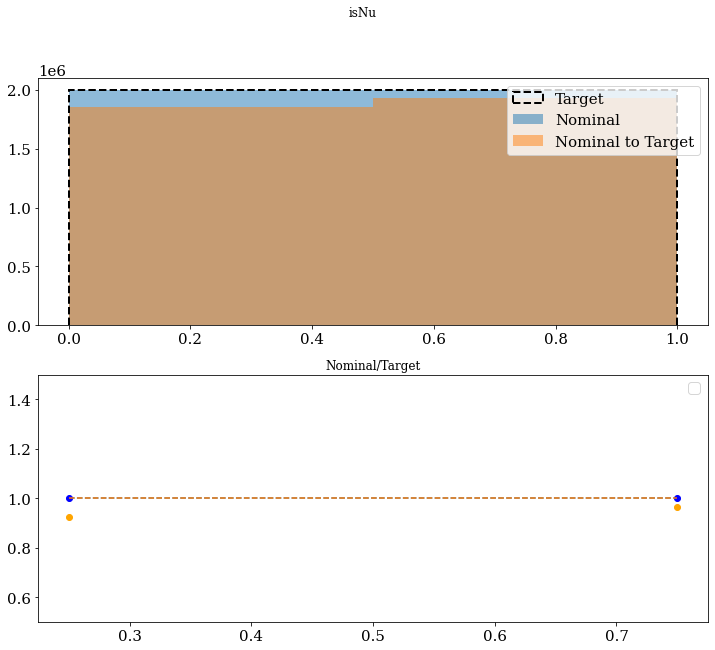

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


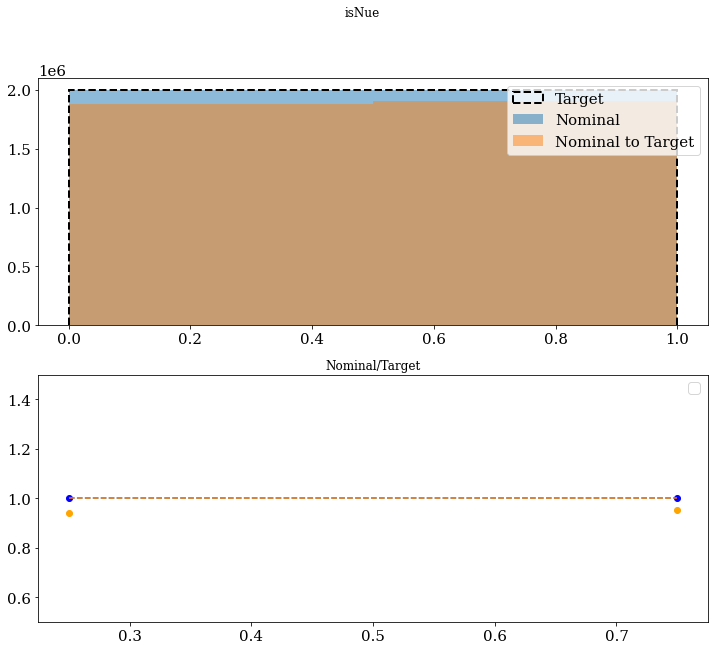

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


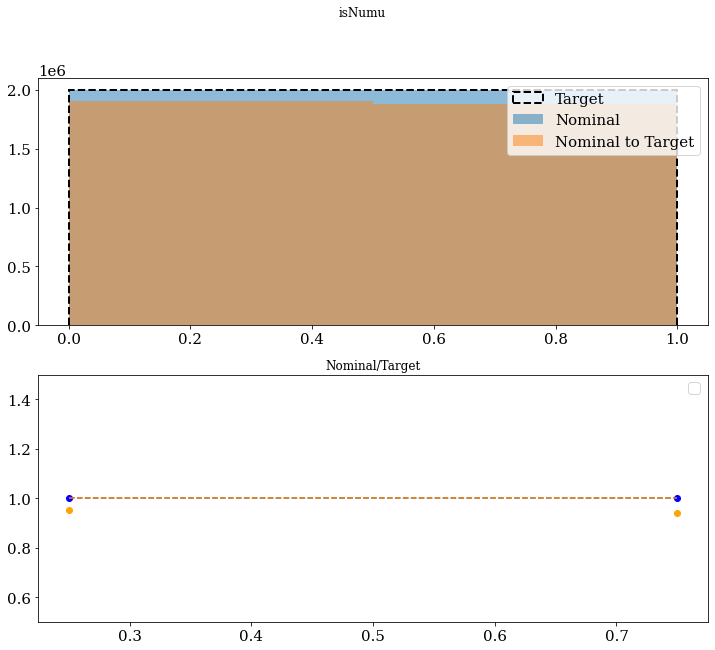

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


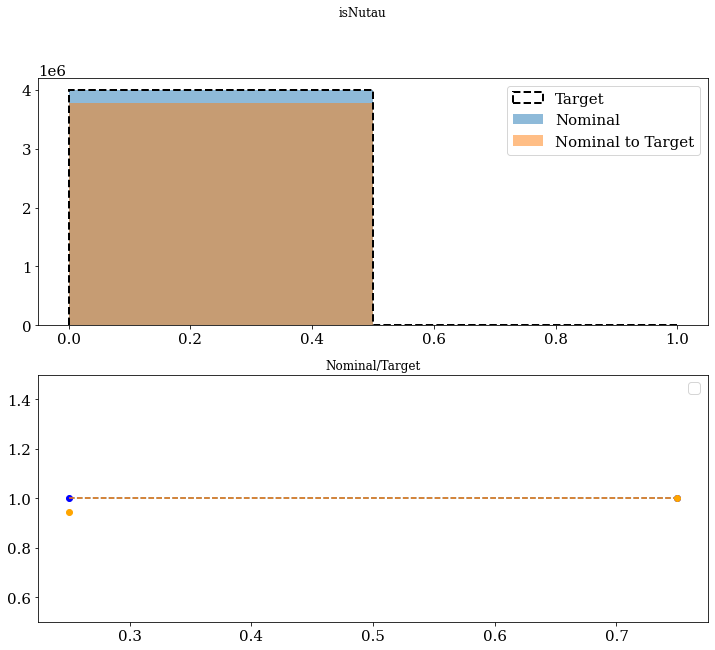

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


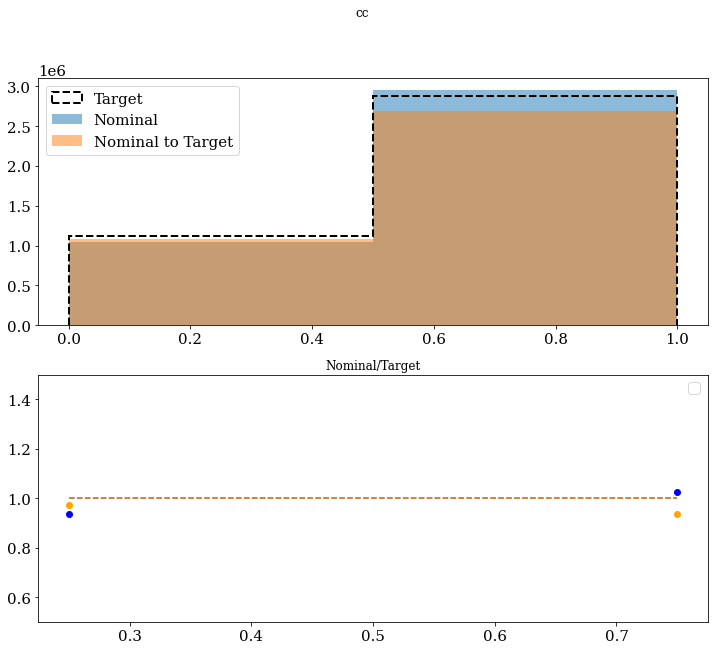

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


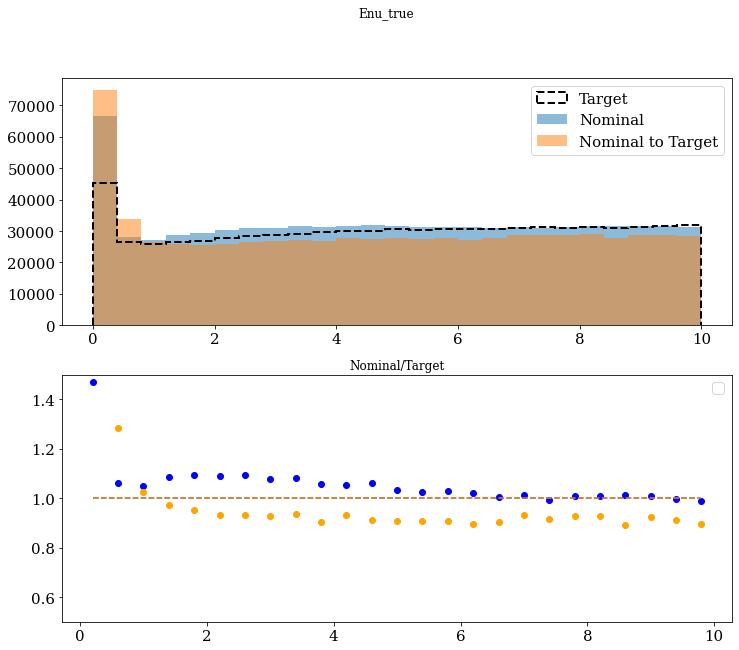

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


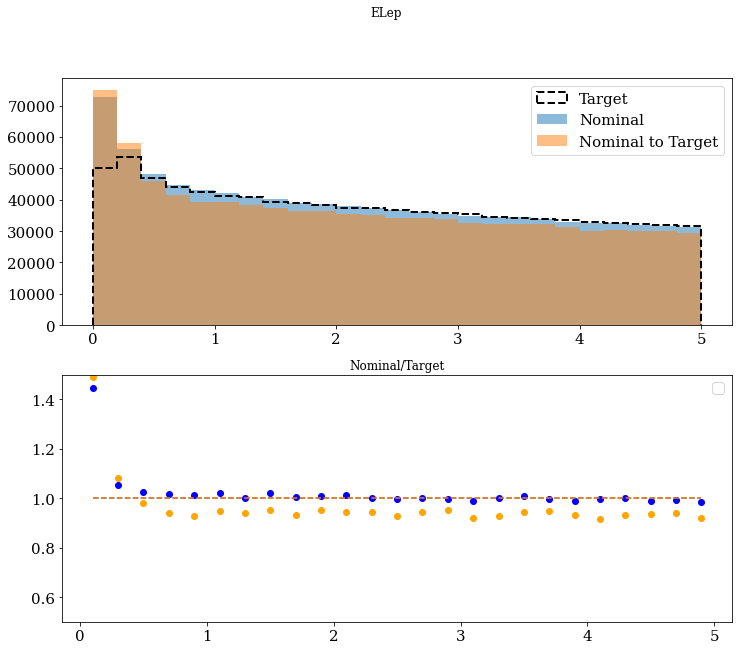

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


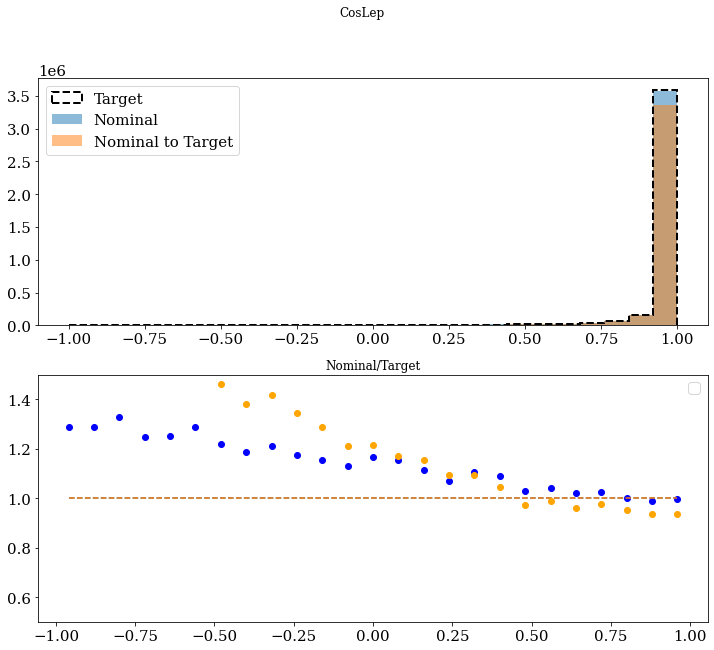

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


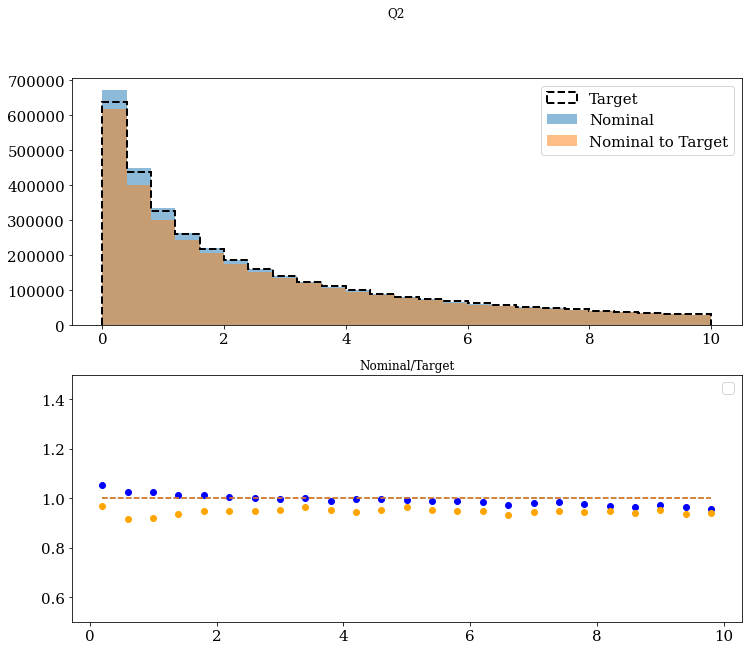

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


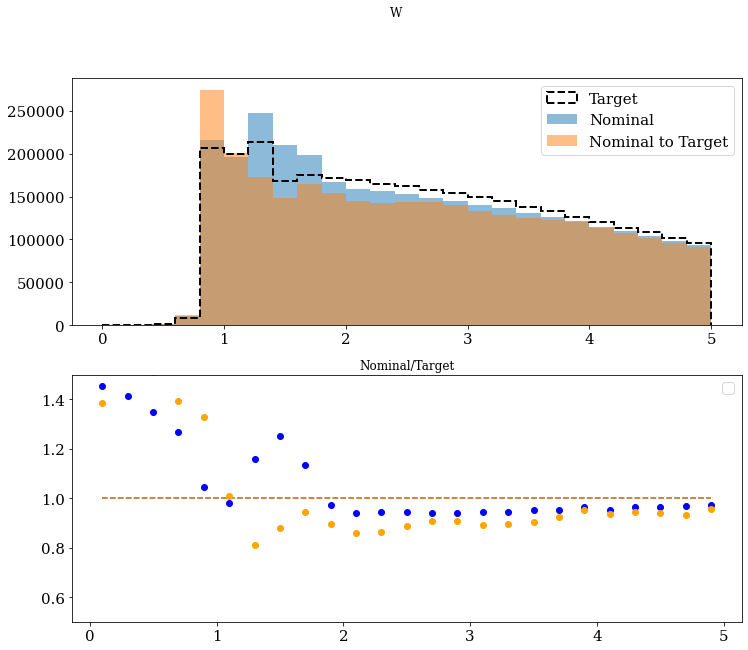

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


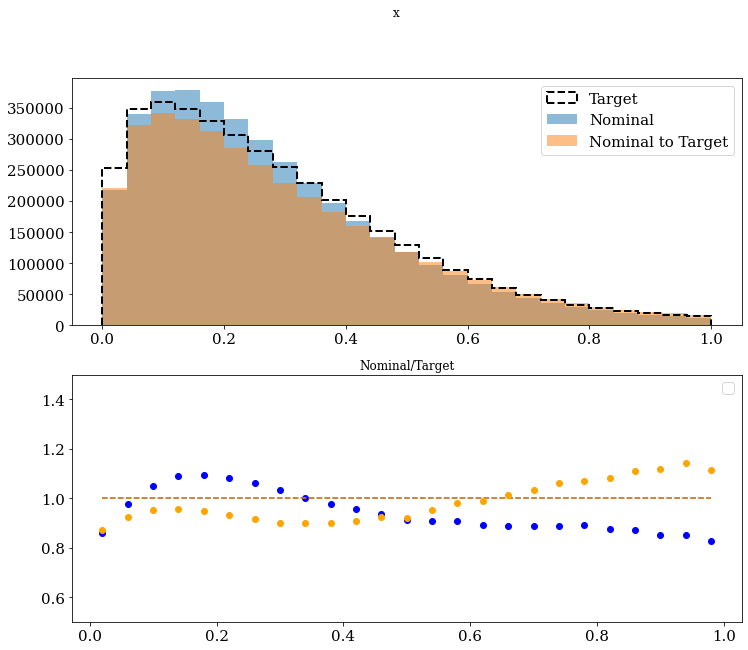

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


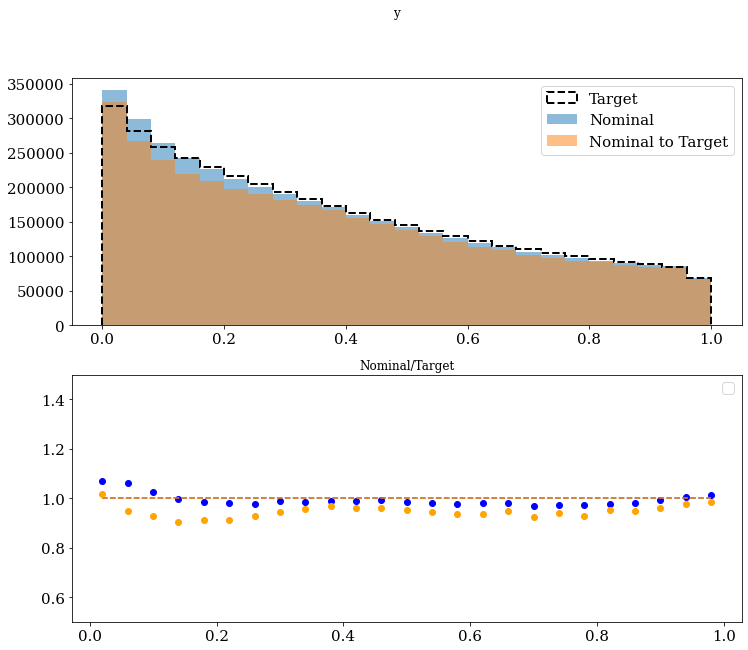

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


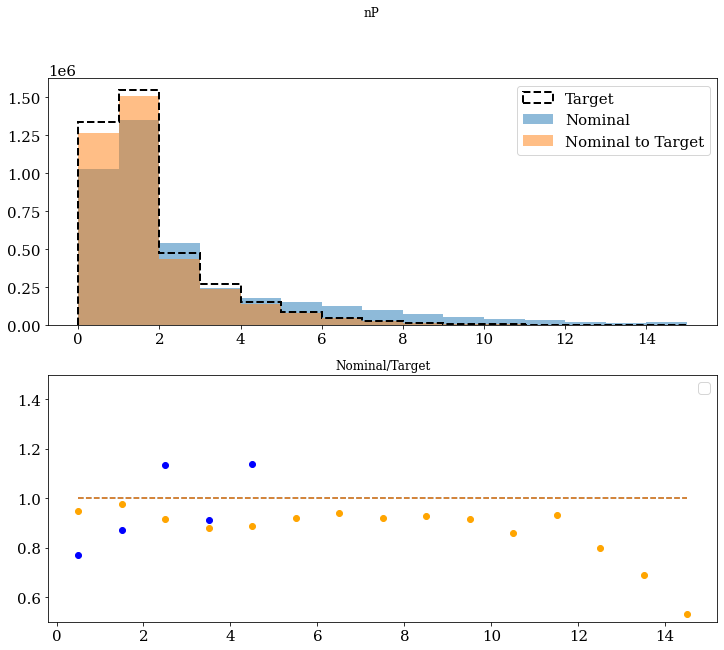

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


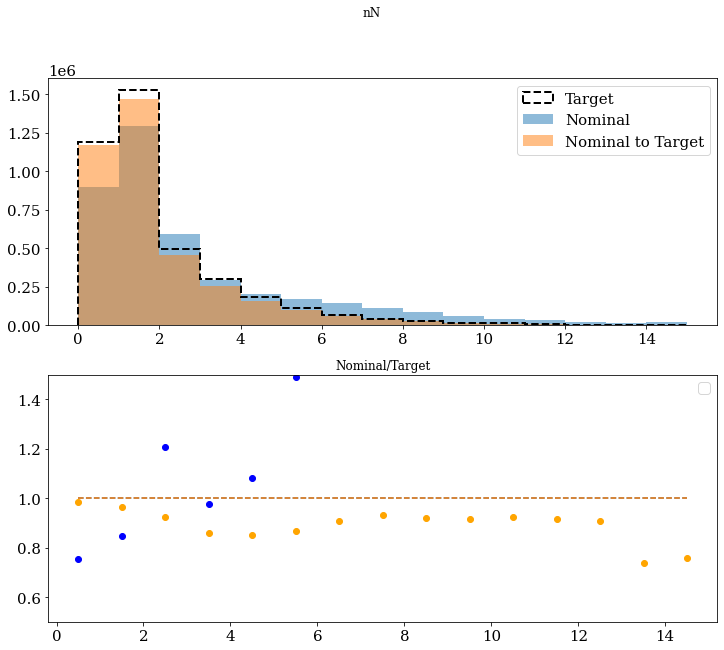

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


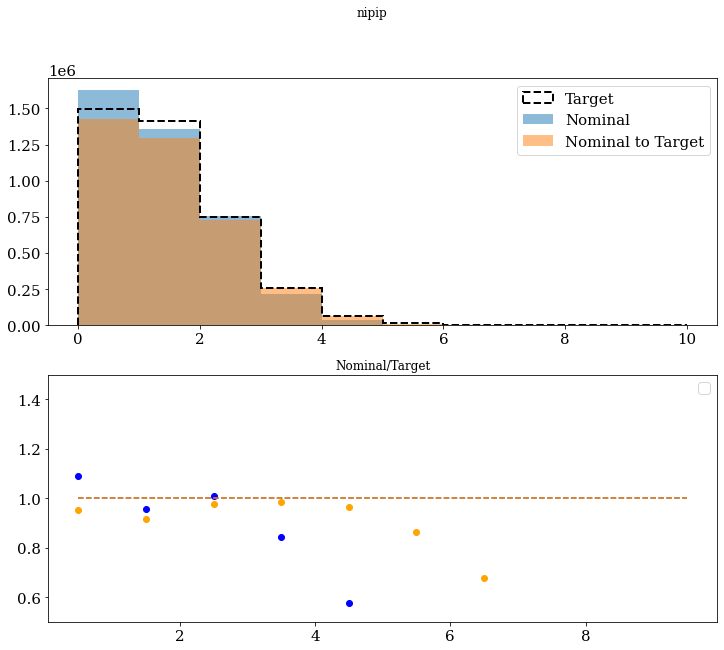

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


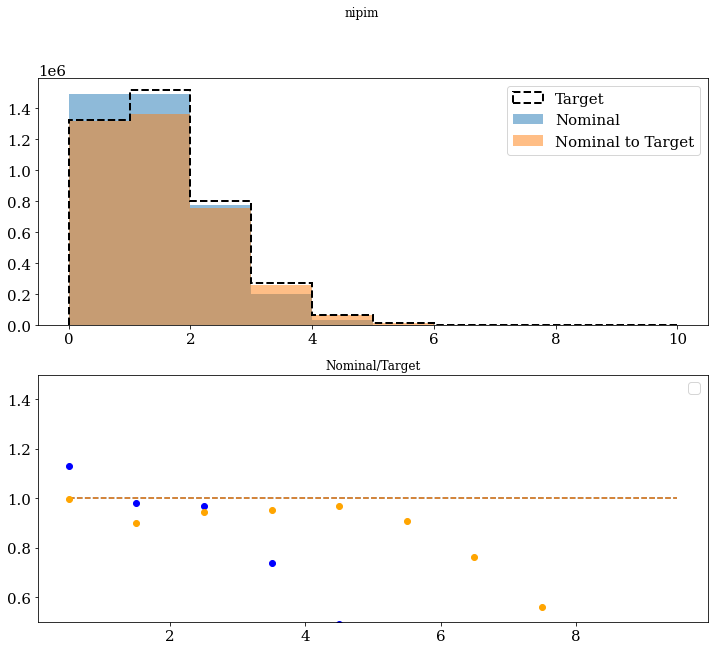

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


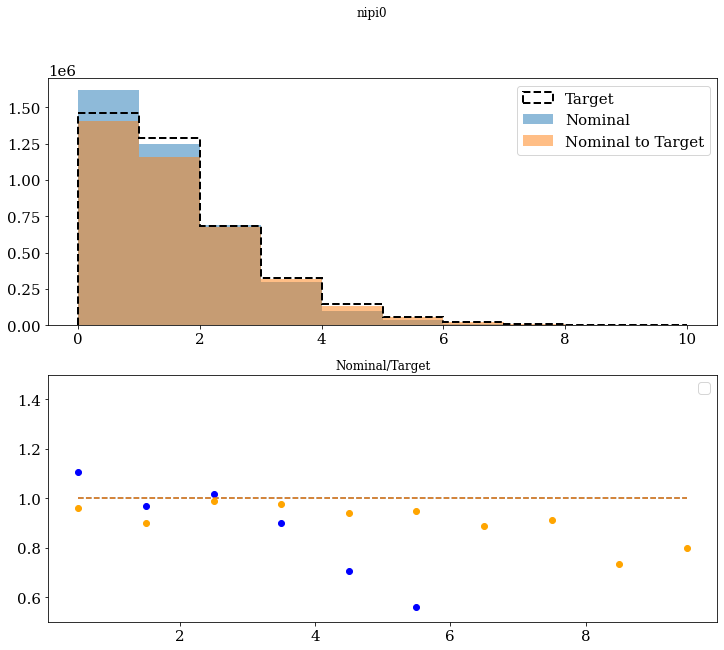

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


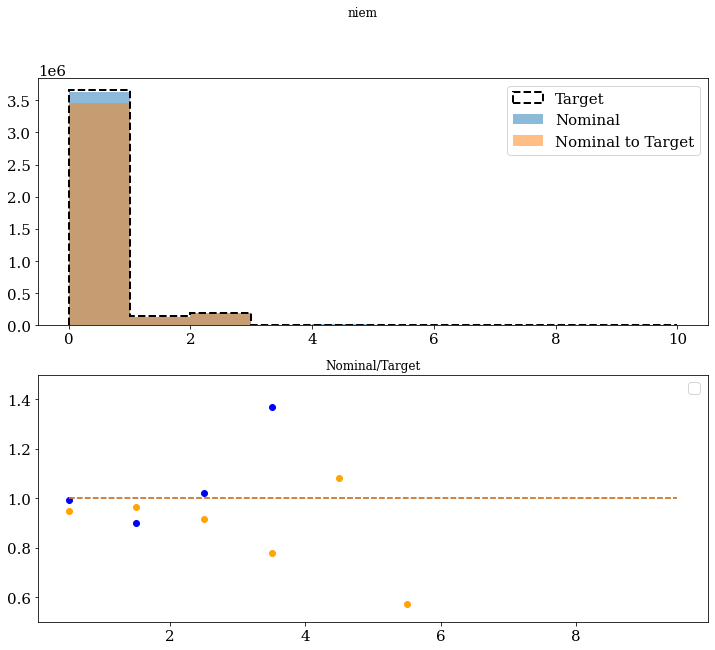

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


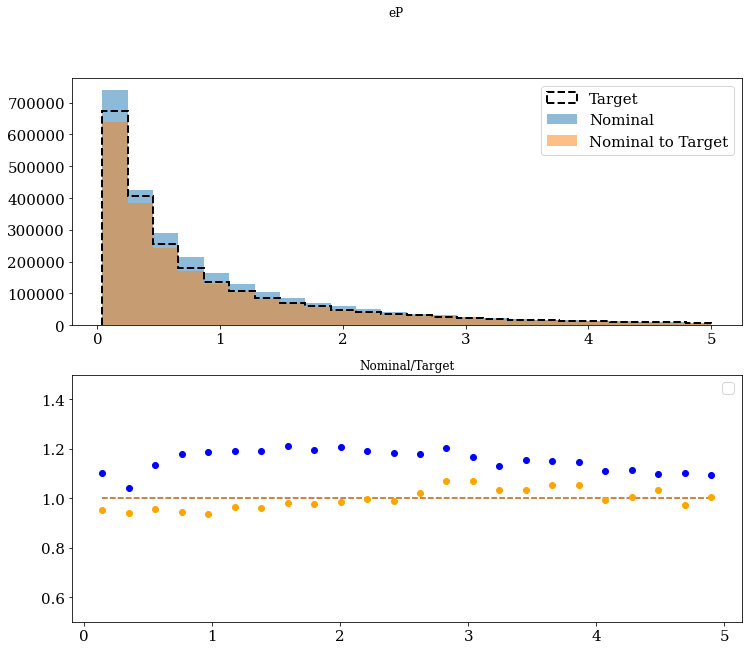

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


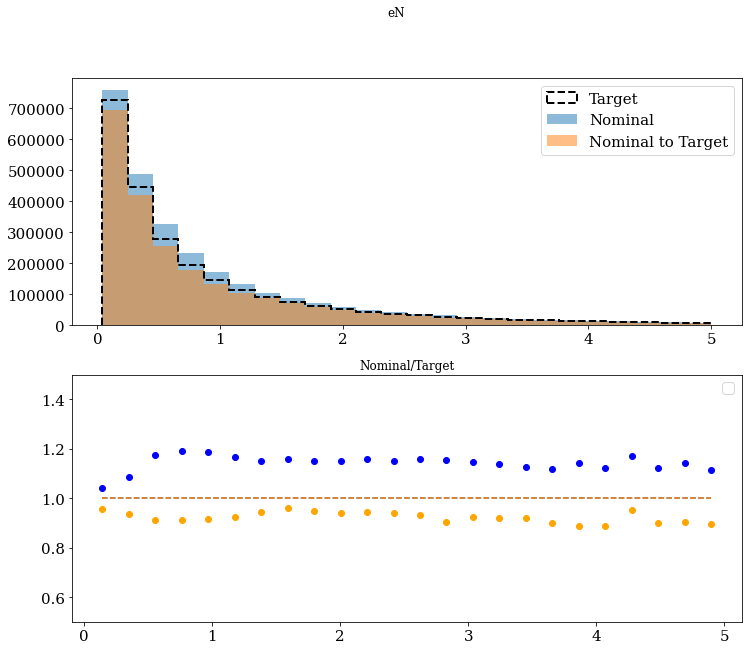

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


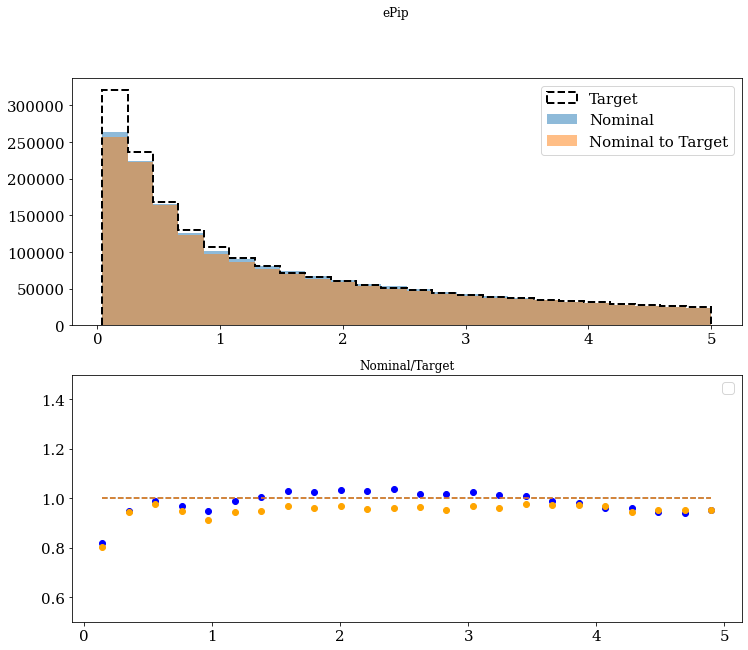

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


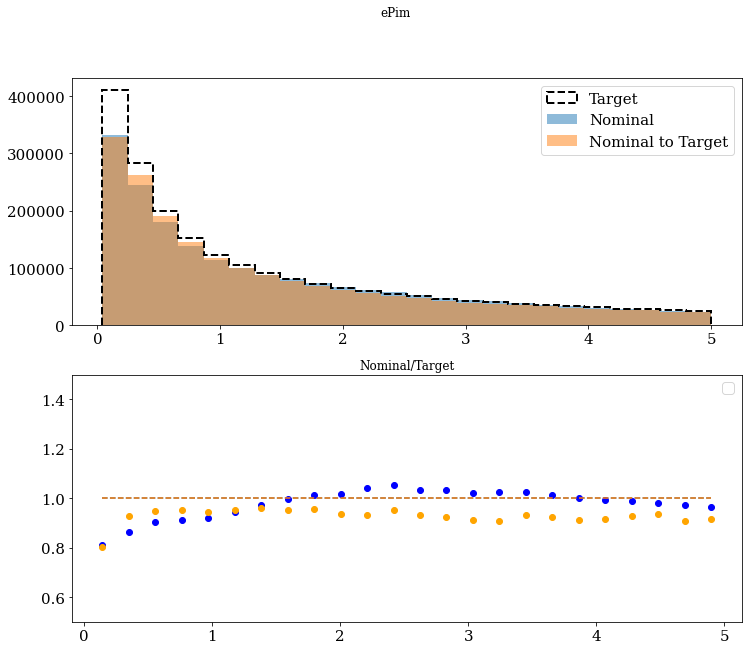

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


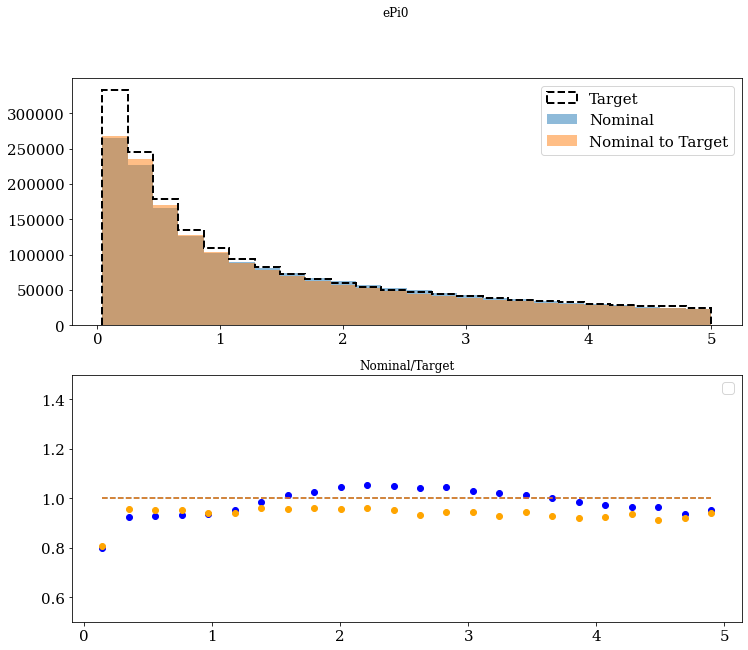

In [8]:
# Calculate weights for GENIE
plt.rcParams['figure.figsize'] = (12, 10)

neut, genie = load_feats_logits()
genie = genie[:len(neut)]
genie['weights'], genie['probas'] = calculate_weights(genie['logits'], weight_cap=1000)
neut['weights'], neut['probas'] = calculate_weights(neut['logits'], weight_cap=1000)

for idx, variable in enumerate(col_names):
    range = (float(x_min[idx]), float(x_max[idx]))
    plot_distribution(genie[variable], neut[variable], genie['weights'], n_bins=int(n_bins[idx]), errorbars=False, density=False, range=range)
    plt.suptitle(variable)
    plt.legend()
    plt.show()

(0.0, 299104.05)

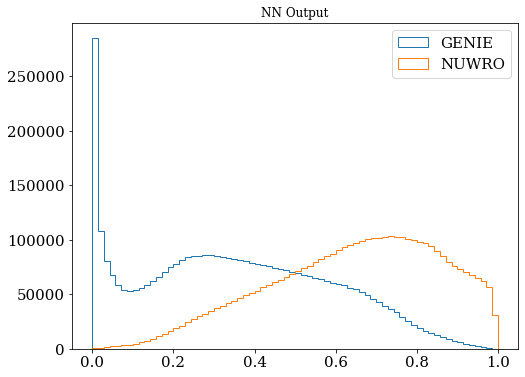

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.hist(genie['probas'], bins=70, histtype="step", label='GENIE')
plt.hist(neut['probas'], bins=70, histtype="step", label='NUWRO')
plt.legend()
plt.title('NN Output')
plt.ylim()

(0.0, 1632063.3)

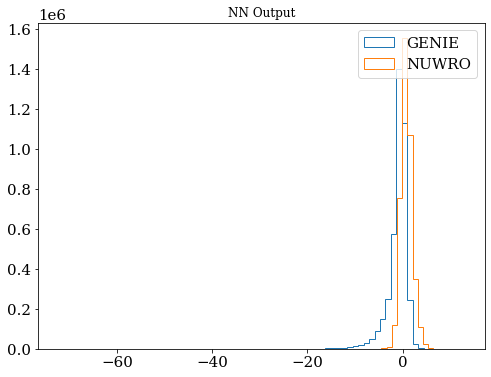

In [7]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.hist(np.array(genie['logits']), bins=70, histtype="step", label='GENIE')
plt.hist(np.array(neut['logits']), bins=70, histtype="step", label='NUWRO')
plt.legend()
plt.title('NN Output')
plt.ylim()